In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
student_data = pd.read_csv('../Data/final_student_data.csv')
course_data = pd.read_csv('../Data/final_course_data.csv')
job_data = pd.read_csv('../Data/final_job_data.csv')

## Student Data EDA

### Descriptive Statistics

#### Numerical data

In [101]:
num = student_data.describe()  
num

,Percentage_12th
count,256.000000
mean,85.136719
std,9.796001
min,50.000000
25%,75.000000
50%,85.000000
75%,95.000000
max,95.000000


#### Categorical data (Count & Percentage)

In [102]:
cat = student_data.iloc[:,2:]

count = student_data.iloc[:,2:].value_counts()
count

Skills                                                                                      Career_Goal              
Python, Java, C++, Data Structures, Algorithms, Git                                         Software Engineer            50
Python, R, Data Analysis, Machine Learning, SQL, Data Visualization                         Data Scientist               42
Python, Machine Learning, Deep Learning, TensorFlow, PyTorch, Algorithms, Data Structures   Machine Learning Engineer    25
HTML, CSS, JavaScript, React, Node.js, Angular, APIs, Databases                             Web Developer                23
Python, AI, Machine Learning, Neural Networks, Deep Learning, TensorFlow                    AI Engineer                  13
Robotics, AI, C++, Embedded Systems, MATLAB, ROS                                            Robotics Engineer             7
SQL, Excel, Data Visualization, Python, R, Tableau, Power BI                                Data Analyst                  7
Cloud Computin

In [103]:
cat.value_counts(normalize=True)

Skills                                                                                      Career_Goal              
Python, Java, C++, Data Structures, Algorithms, Git                                         Software Engineer            0.265957
Python, R, Data Analysis, Machine Learning, SQL, Data Visualization                         Data Scientist               0.223404
Python, Machine Learning, Deep Learning, TensorFlow, PyTorch, Algorithms, Data Structures   Machine Learning Engineer    0.132979
HTML, CSS, JavaScript, React, Node.js, Angular, APIs, Databases                             Web Developer                0.122340
Python, AI, Machine Learning, Neural Networks, Deep Learning, TensorFlow                    AI Engineer                  0.069149
Robotics, AI, C++, Embedded Systems, MATLAB, ROS                                            Robotics Engineer            0.037234
SQL, Excel, Data Visualization, Python, R, Tableau, Power BI                                Data Analy

### Count Distribution

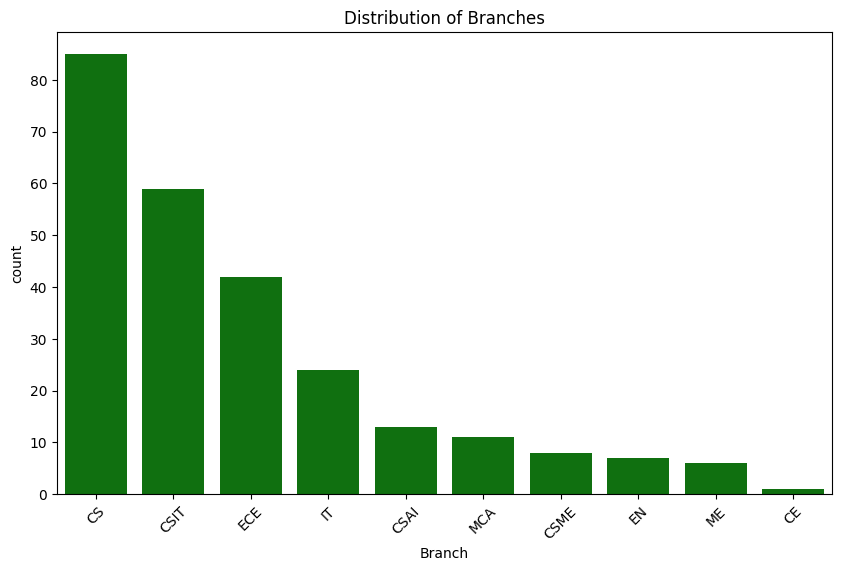

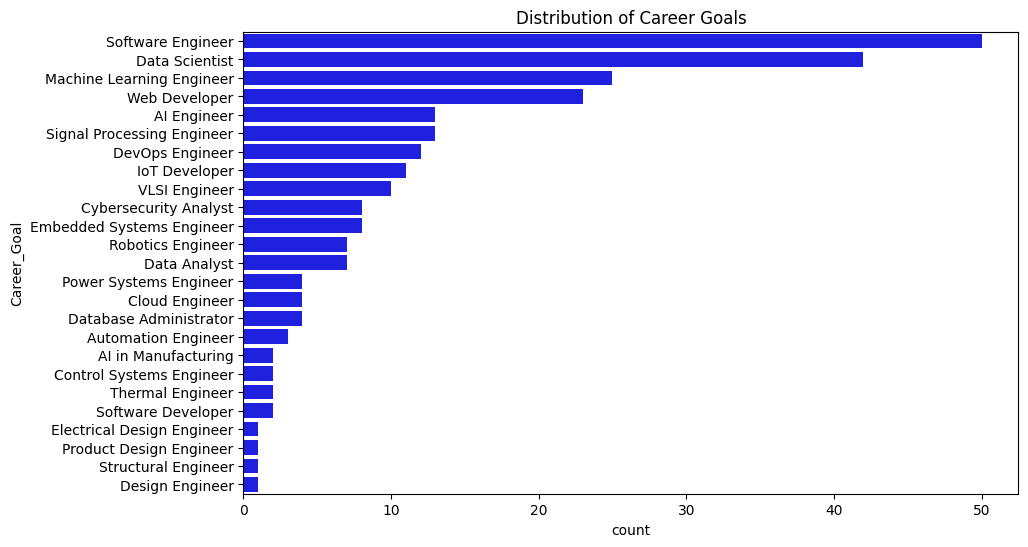

In [104]:
plt.figure(figsize=(10, 6))
sns.countplot(data=student_data, x='Branch', order=student_data['Branch'].value_counts().index, color='green')
plt.title("Distribution of Branches")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=student_data, y='Career_Goal', order=student_data['Career_Goal'].value_counts().index, color='blue')
plt.title("Distribution of Career Goals")
plt.show()


### Percentage Distribution

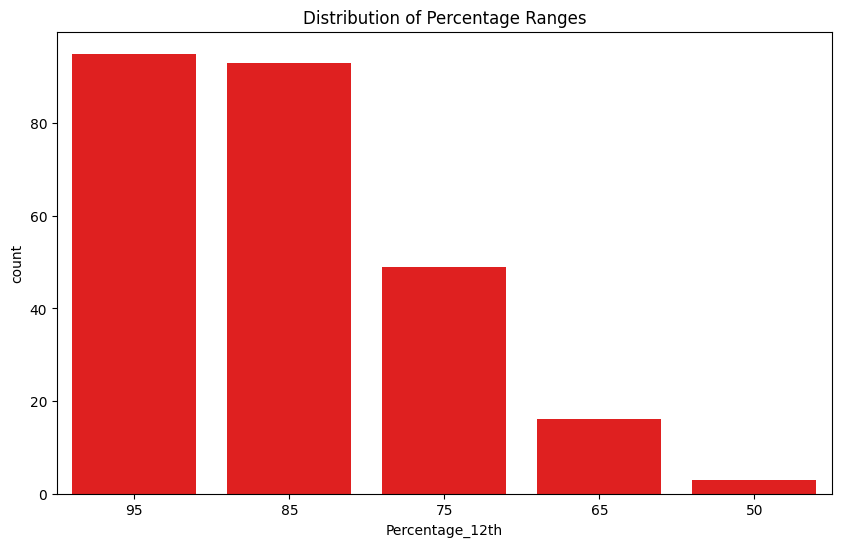

In [105]:
plt.figure(figsize=(10, 6))
sns.countplot(data=student_data, x='Percentage_12th', order=student_data['Percentage_12th'].value_counts().index, color='red')
plt.title("Distribution of Percentage Ranges")
plt.show()

### Student Skills Analysis

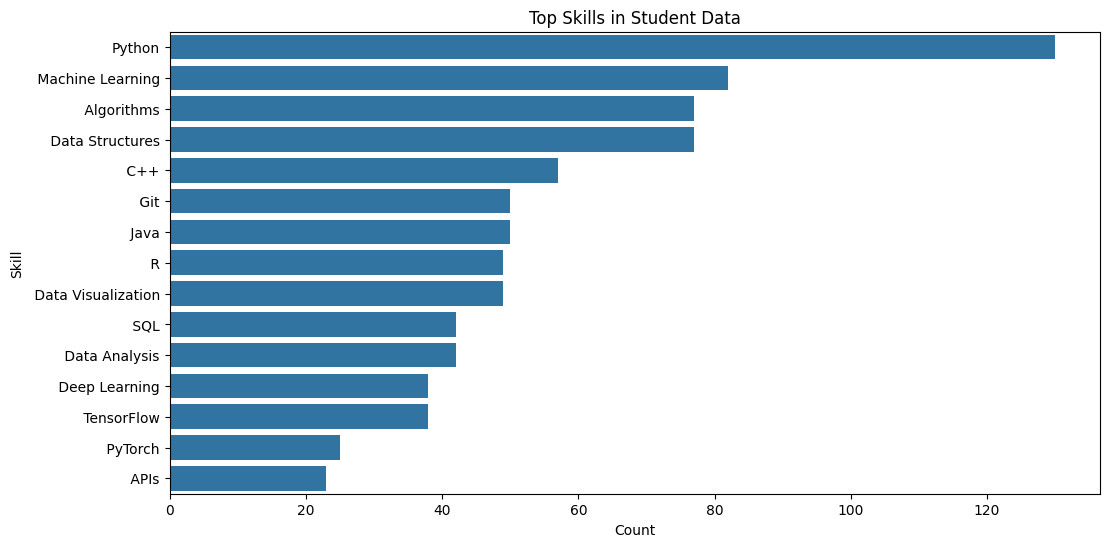

In [106]:
from collections import Counter

skills = student_data['Skills'].dropna().str.split(',').sum()
skills_count = Counter(skills)

skills_df = pd.DataFrame(skills_count.items(), columns=['Skill', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=skills_df.head(15), x='Count', y='Skill')
plt.title("Top Skills in Student Data")
plt.show()


### Distribution of branches taken by students

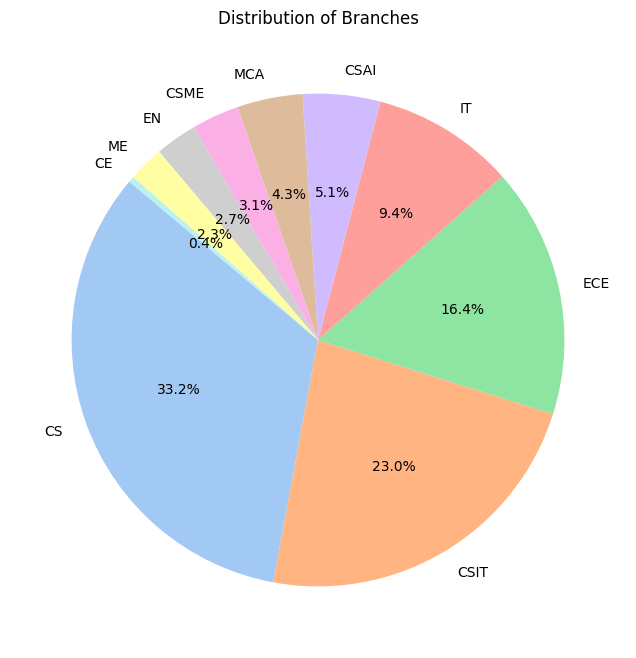

In [107]:
branch_counts = student_data['Branch'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(branch_counts, labels=branch_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Distribution of Branches")
plt.show()


### Scatter plot on Percentage vs Career goal

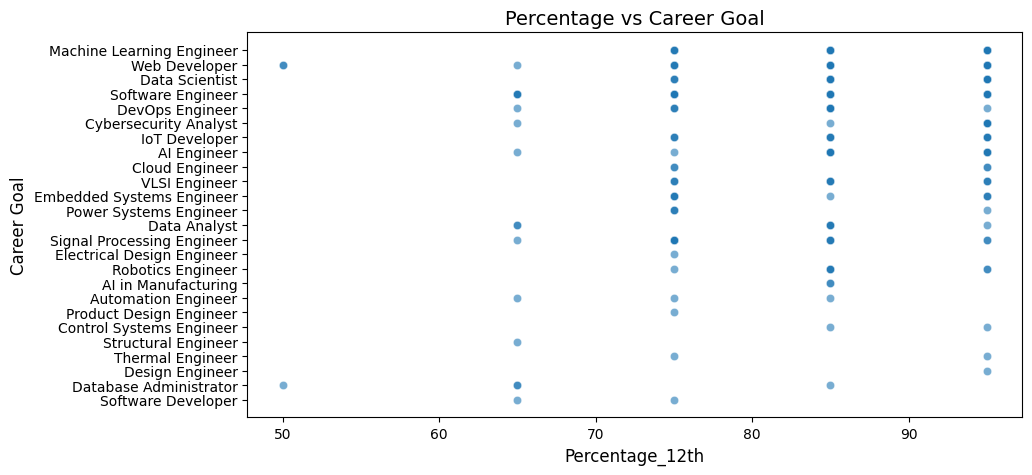

In [108]:
def plot_scatter_chart(data, x_column, y_column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=data, x=x_column, y=y_column, alpha=0.6)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.show()

plot_scatter_chart(student_data, "Percentage_12th", "Career_Goal", "Percentage vs Career Goal", "Percentage_12th", "Career Goal")

### Analysis of 12th Percentage using Box plot, Violen plot, and Density plot

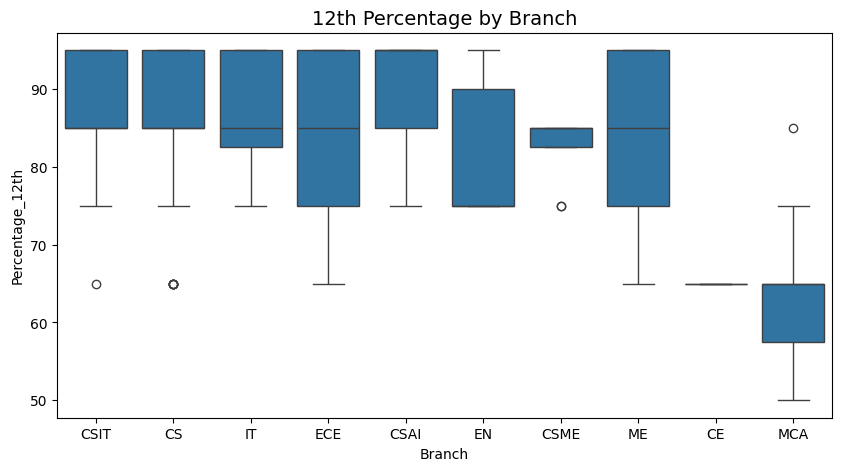

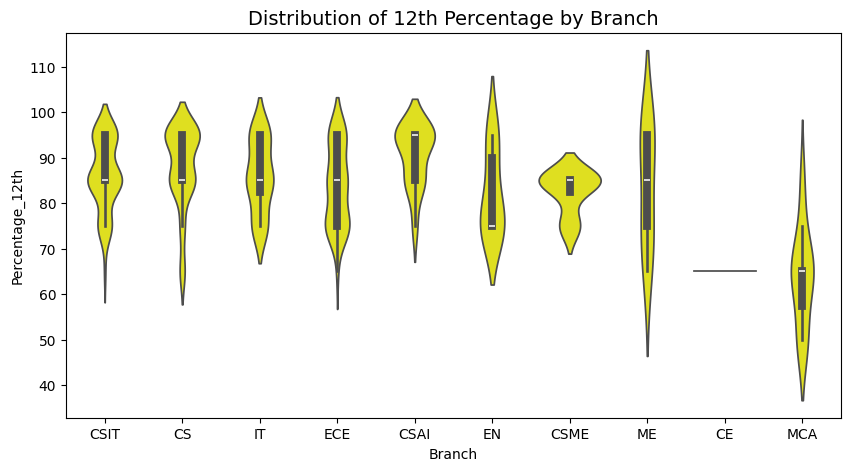

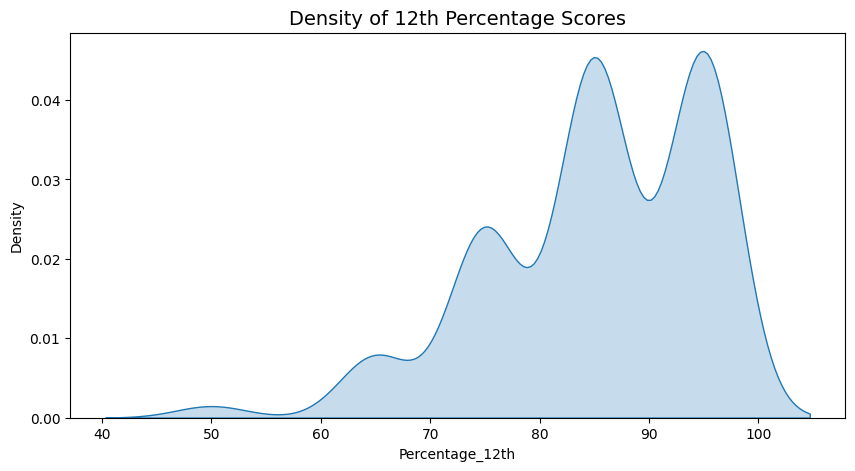

In [109]:
def plot_box_chart(data, x_column, y_column, title):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data, x=x_column, y=y_column)
    plt.title(title, fontsize=14)
    plt.show()

def plot_violin_chart(data, x_column, y_column, title):
    plt.figure(figsize=(10, 5))
    sns.violinplot(data=data, x=x_column, y=y_column, color= 'yellow')
    plt.title(title, fontsize=14)
    plt.show()

def plot_density_chart(data, column, title):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data[column], fill=True)
    plt.title(title, fontsize=14)
    plt.show()

plot_box_chart(student_data, "Branch", "Percentage_12th", "12th Percentage by Branch")
plot_violin_chart(student_data, "Branch", "Percentage_12th", "Distribution of 12th Percentage by Branch")
plot_density_chart(student_data, "Percentage_12th", "Density of 12th Percentage Scores")

## Course Data EDA

### Descriptive Statistics

#### Categorical Data (Count & Percentage)

In [110]:
count = course_data[['Title', 'Category', 'Course Type']].value_counts()
count

Title                                                            Category                Course Type             
Google Cloud Fundamentals: Core Infrastructure                   Information Technology  Course                      7
Introduction to Cloud Computing                                  Information Technology  Course                      6
Databases and SQL for Data Science with Python                   Data Science            Course                      5
Python for Data Science, AI & Development                        Data Science            Course                      5
The Art of Music Production                                      Arts and Humanities     Course                      5
                                                                                                                    ..
Excellence in Online Teaching                                    Social Sciences         Course                      1
Excel/VBA for Creative Problem Solving Specialization

### Frequency of people with certain skills

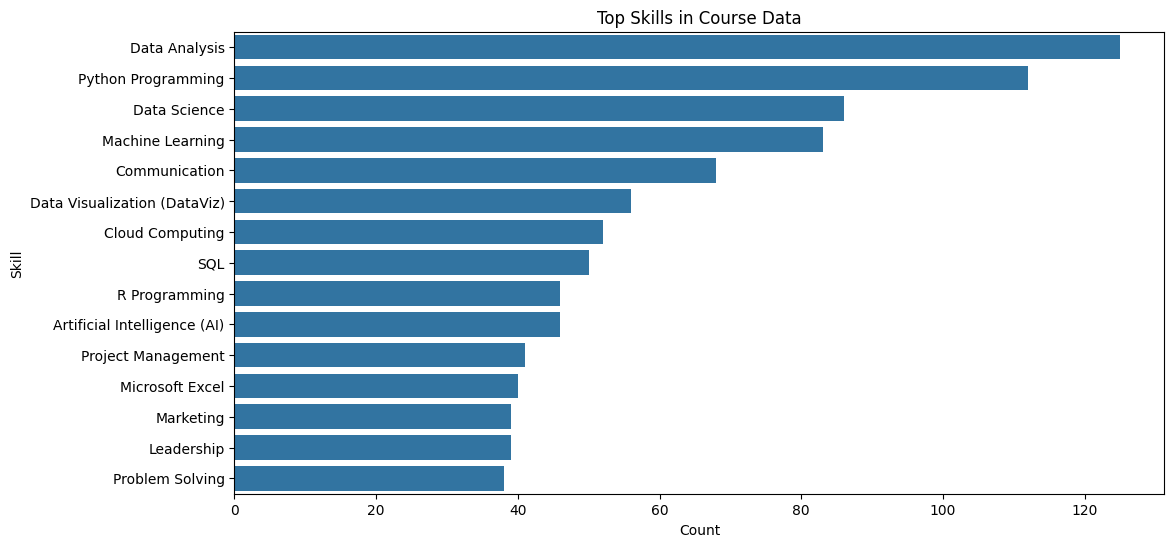

In [111]:
course_skills = course_data['Skills'].dropna().str.split(',').sum()
course_skills_count = Counter(course_skills)

course_skills_df = pd.DataFrame(course_skills_count.items(), columns=['Skill', 'Count']).sort_values(by='Count', ascending=False)
course_skills_df = course_skills_df[~course_skills_df['Skill'].isin(['', ' '])]
plt.figure(figsize=(12, 6))
sns.barplot(data=course_skills_df.head(15), x='Count', y='Skill')
plt.title("Top Skills in Course Data")
plt.show()

### Distribution of course type

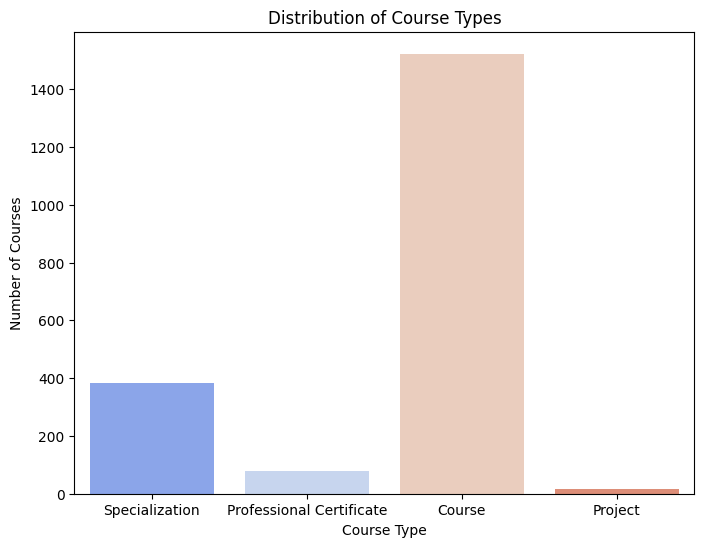

In [112]:
plt.figure(figsize=(8, 6))
sns.countplot(data=course_data, x='Course Type', palette='coolwarm', hue='Course Type')
plt.title("Distribution of Course Types")
plt.xlabel("Course Type")
plt.ylabel("Number of Courses")
plt.show()


### Distribution of course categories

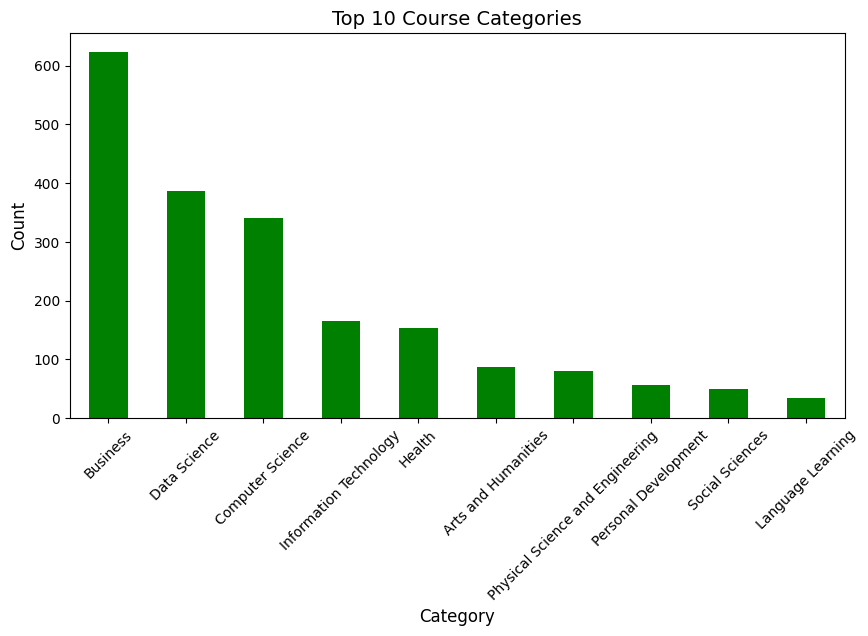

In [113]:
def plot_bar_chart(data, column, title, xlabel, ylabel, top_n=10, rotation=45, color = 'blue'):
    plt.figure(figsize=(10, 5))
    data[column].value_counts().nlargest(top_n).plot(kind='bar', color=color)
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=rotation)
    plt.show()

plot_bar_chart(course_data, "Category", "Top 10 Course Categories", "Category", "Count", color = 'green')

### Relationship Between Course Category and Course Type

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 12469 (\N{KATAKANA LETTER SA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing fr

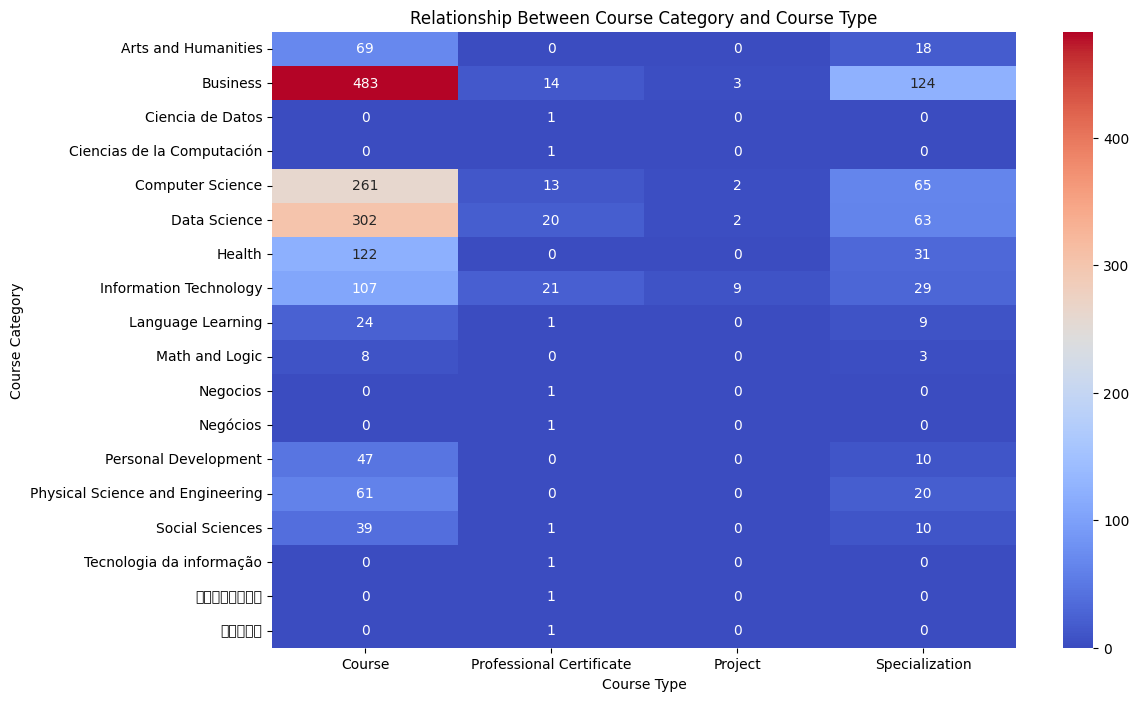

In [114]:

category_course_type = pd.crosstab(course_data['Category'], course_data['Course Type'])
category_course_type.fillna(0, inplace=True)

plt.figure(figsize=(12, 8))
sns.heatmap(category_course_type, annot=True, cbar=True, cmap='coolwarm', fmt='d', annot_kws={"size": 10})

plt.title("Relationship Between Course Category and Course Type")
plt.xlabel("Course Type")
plt.ylabel("Course Category")

plt.show()

### Piechart on course category distribution

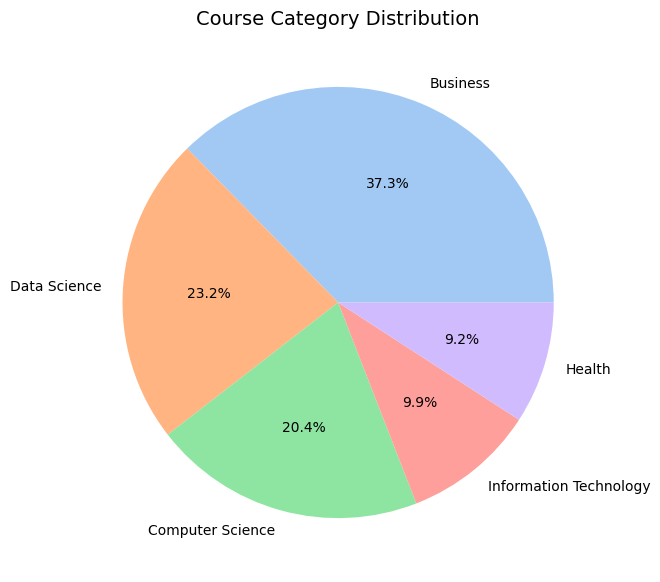

In [115]:
def plot_pie_chart(data, column, title, top_n=5):
    plt.figure(figsize=(7, 7))
    data[column].value_counts().nlargest(top_n).plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"))
    plt.title(title, fontsize=14)
    plt.ylabel('')
    plt.show()

plot_pie_chart(course_data, "Category", "Course Category Distribution")

## Job Data EDA

### Descriptive Statistics

#### Numerical Data

In [116]:
num = job_data.describe()  
num

,Job Posting ID
count,2.505300e+04
mean,2.688292e+09
std,6.217486e+07
min,1.573681e+09
25%,2.678760e+09
50%,2.696124e+09
75%,2.721754e+09
max,2.797780e+09


#### Categorical Data (Count & Percentage)

In [117]:
cat = job_data[['Job Title', 'Job Location', 'Company Name']]
count = cat.value_counts()
count

Job Title          Job Location            Company Name     
Business Analyst   United States           Dice                 53
Software Engineer  San Francisco, CA       Jobot                51
Data Engineer      United States           Dice                 50
Developer          United States           Dice                 48
Software Engineer  New York, NY            Jobot                46
                                                                ..
Data Scientist     McLean, VA              US Tech Solutions     1
                                           hatch I.T.            1
                   Medina, MN              Horizontal Talent     1
                   Melbourne, FL           Toptal                1
Digital Analyst    San Francisco Bay Area  Harnham               1
Name: count, Length: 14985, dtype: int64

In [118]:
count = cat.value_counts(normalize=True)
count

Job Title          Job Location            Company Name     
Business Analyst   United States           Dice                 0.002116
Software Engineer  San Francisco, CA       Jobot                0.002036
Data Engineer      United States           Dice                 0.001996
Developer          United States           Dice                 0.001916
Software Engineer  New York, NY            Jobot                0.001836
                                                                  ...   
Data Scientist     McLean, VA              US Tech Solutions    0.000040
                                           hatch I.T.           0.000040
                   Medina, MN              Horizontal Talent    0.000040
                   Melbourne, FL           Toptal               0.000040
Digital Analyst    San Francisco Bay Area  Harnham              0.000040
Name: proportion, Length: 14985, dtype: float64

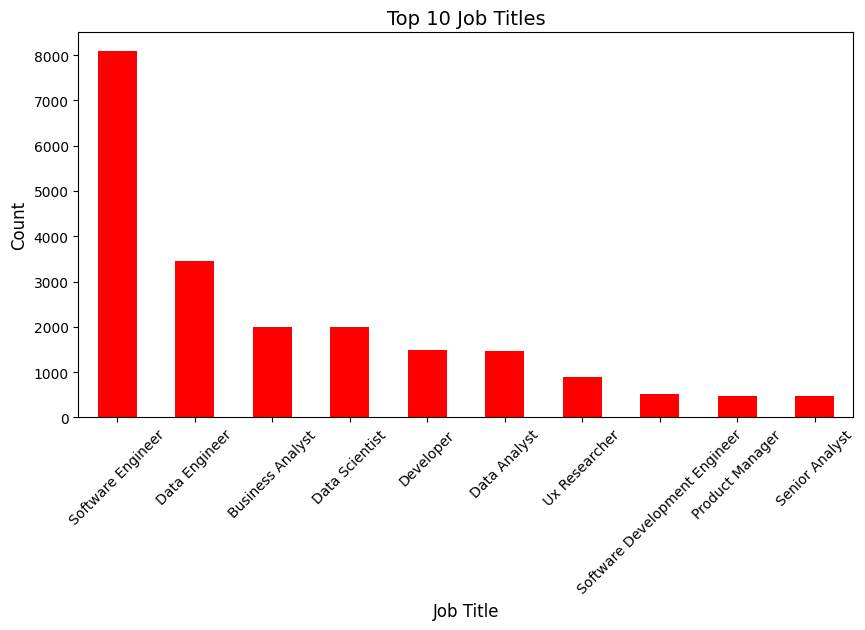

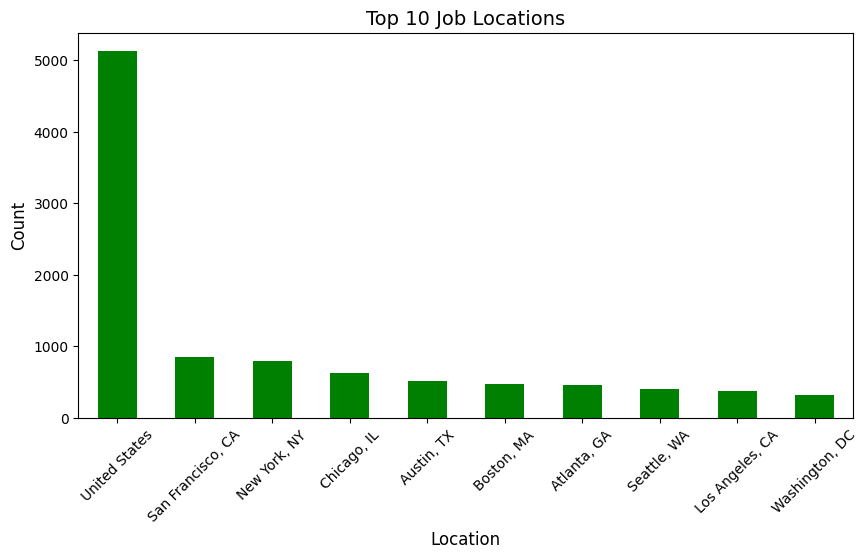

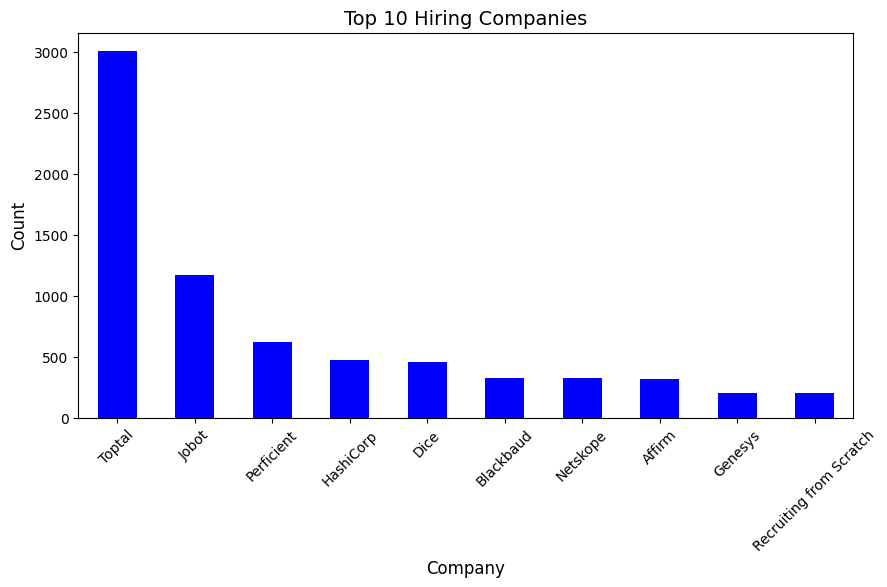

In [119]:
plot_bar_chart(job_data, "Job Title", "Top 10 Job Titles", "Job Title", "Count",  color='red')
plot_bar_chart(job_data, "Job Location", "Top 10 Job Locations", "Location", "Count",  color='green')
plot_bar_chart(job_data, "Company Name", "Top 10 Hiring Companies", "Company", "Count",  color='blue')

### Piechart on Job Location Distribution

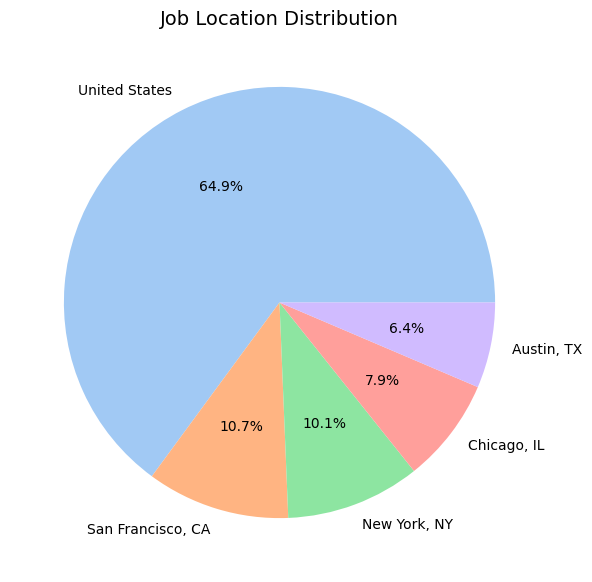

In [120]:
plot_pie_chart(job_data, "Job Location", "Job Location Distribution")

### Analysis on skills required per job

In [121]:
job_data['Job Skills'] = job_data['Job Skills'].str.split(',')
job_data['Number of Skills'] = job_data['Job Skills'].apply(lambda x: len(x))
average_skills = job_data['Number of Skills'].mean()
print(f"Average Number of Skills Required: {average_skills:.2f}")

Average Number of Skills Required: 6.50


In [122]:
### Max skills number
max_skills = job_data['Number of Skills'].max()
print(f"Maximum Number of Skills Required: {max_skills}")

Maximum Number of Skills Required: 42


In [123]:
min_skills = job_data['Number of Skills'].min()
print(f"Minimum Number of Skills Required: {min_skills}")

Minimum Number of Skills Required: 1


### Plots on Number of Skills Required in Job Listings

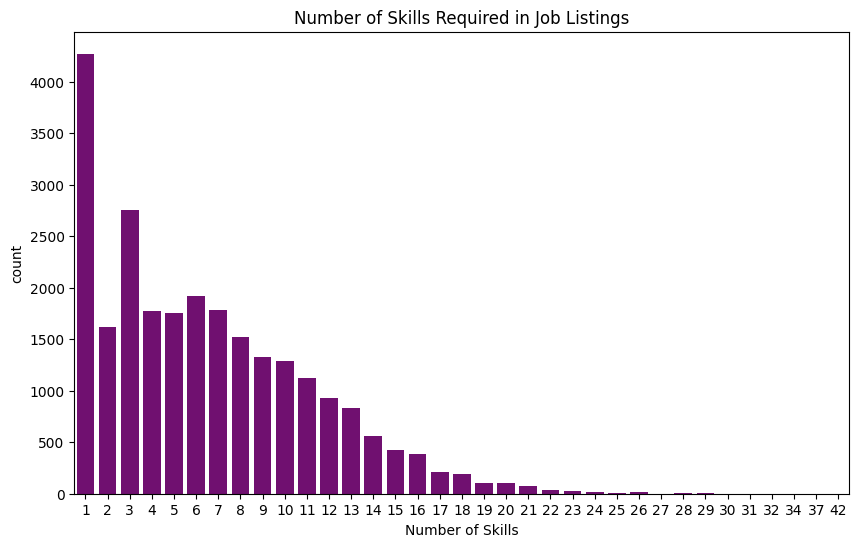

In [124]:
plt.figure(figsize=(10, 6))
sns.countplot(data=job_data, x='Number of Skills', color='purple')
plt.title("Number of Skills Required in Job Listings")
plt.show()


[]

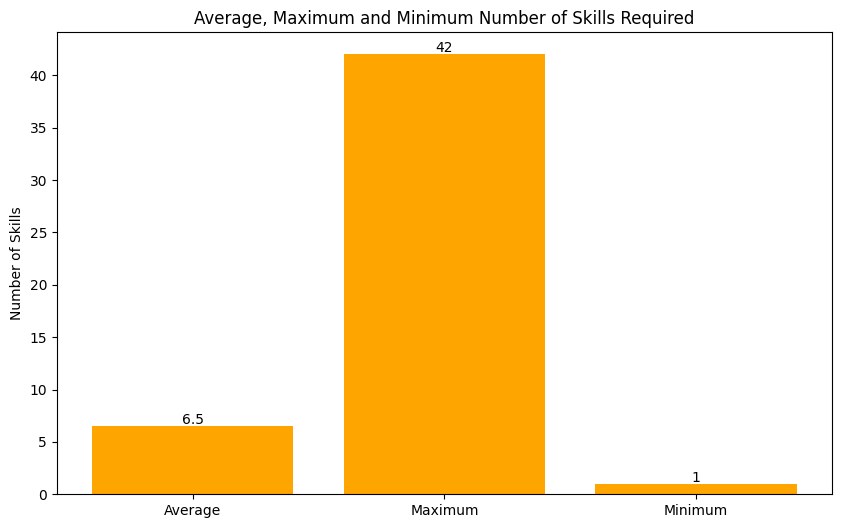

In [125]:
plt.figure(figsize=(10, 6))
plt.bar(['Average', 'Maximum', 'Minimum'], [average_skills, max_skills, min_skills], color='orange')
for i, v in enumerate([average_skills, max_skills, min_skills]):
    plt.text(i, v + 0.2, str(round(v, 2)), ha='center')
plt.title("Average, Maximum and Minimum Number of Skills Required")
plt.ylabel("Number of Skills")
plt.plot()

### Histogram on Job posting date

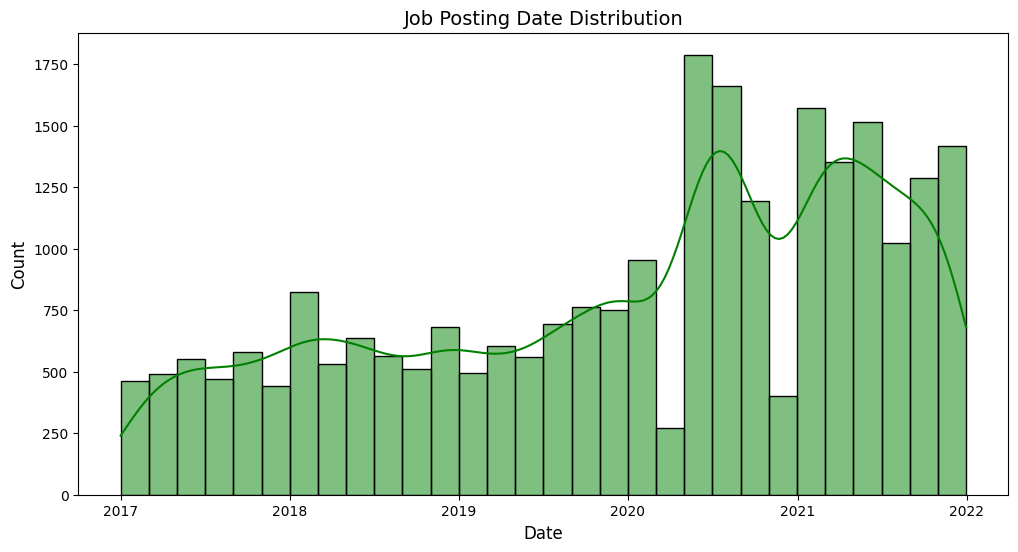

In [126]:
job_data["Job Posting Date"] = pd.to_datetime(job_data["Job Posting Date"], errors="coerce")

plt.figure(figsize=(12, 6))
sns.histplot(job_data["Job Posting Date"], bins=30, kde=True, color="green")
plt.title("Job Posting Date Distribution", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


## Statistical tests

### Student Data

### Skewness and Kurtosis

In [127]:
skewness = student_data['Percentage_12th'].skew()
kurtosis = student_data['Percentage_12th'].kurt()
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")


Skewness: -0.9277858369889596
Kurtosis: 0.7225891033998031


### Chi2

In [128]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(student_data['Branch'], student_data['Career_Goal'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("\nTest 1: Chi-Square Test for 'Career Goal' vs 'Branch'")
print(f"Chi-Square Statistic: {chi2_stat}, p-value: {p_value}")



Test 1: Chi-Square Test for 'Career Goal' vs 'Branch'
Chi-Square Statistic: 1509.3387682992636, p-value: 1.408767669633087e-192


In [129]:
contingency_table = pd.crosstab(student_data['Skills'], student_data['Career_Goal'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("\nTest 2: Chi-Square Test for 'Career Goal' vs 'Skills'")
print(f"Chi-Square Statistic: {chi2_stat}, p-value: {p_value}")



Test 2: Chi-Square Test for 'Career Goal' vs 'Skills'
Chi-Square Statistic: 2820.0, p-value: 0.0


### Course Data

### Chi2

In [130]:

contingency_table_1 = pd.crosstab(course_data['Title'], course_data['Category'])
chi2_stat_1, p_value_1, dof_1, expected_1 = chi2_contingency(contingency_table_1)
print("Test 1: Chi-Square Test for 'Title' vs 'Category'")
print(f"Chi-Square Statistic: {chi2_stat_1}")
print(f"p-value: {p_value_1}")

Test 1: Chi-Square Test for 'Title' vs 'Category'
Chi-Square Statistic: 33961.8176431127
p-value: 1.1676627219046236e-48


In [131]:
contingency_table_2 = pd.crosstab(course_data['Title'], course_data['Course Type'])
chi2_stat_2, p_value_2, dof_2, expected_2 = chi2_contingency(contingency_table_2)
print("\nTest 2: Chi-Square Test for 'Title' vs 'Course Type'")
print(f"Chi-Square Statistic: {chi2_stat_2}")
print(f"p-value: {p_value_2}")



Test 2: Chi-Square Test for 'Title' vs 'Course Type'
Chi-Square Statistic: 5994.0
p-value: 3.8647611965342743e-10


In [132]:
contingency_table_3 = pd.crosstab(course_data['Category'], course_data['Course Type'])
chi2_stat_3, p_value_3, dof_3, expected_3 = chi2_contingency(contingency_table_3)
print("\nTest 3: Chi-Square Test for 'Category' vs 'Course Type'")
print(f"Chi-Square Statistic: {chi2_stat_3}")
print(f"p-value: {p_value_3}")


Test 3: Chi-Square Test for 'Category' vs 'Course Type'
Chi-Square Statistic: 288.0064483272377
p-value: 8.532415586121692e-35


In [133]:

contingency_table_4 = pd.crosstab(course_data['Category'], course_data['Skills'])
chi2_stat_4, p_value_4, dof_4, expected_4 = chi2_contingency(contingency_table_4)
print("\nTest 4: Chi-Square Test for 'Category' vs 'Skills'")
print(f"Chi-Square Statistic: {chi2_stat_4}")
print(f"p-value: {p_value_4}")


Test 4: Chi-Square Test for 'Category' vs 'Skills'
Chi-Square Statistic: 33960.48898588283
p-value: 2.5419536796717192e-78


### Job Data

### Chi2

In [134]:
contingency_table_2 = pd.crosstab(job_data['Job Title Full'], job_data['Job Location'])
chi2_stat_2, p_value_2, dof_2, expected_2 = chi2_contingency(contingency_table_2)
print("\nTest 1: Chi-Square Test for 'Job Title Full' vs 'Job Location'")
print(f"Chi-Square Statistic: {chi2_stat_2}")
print(f"p-value: {p_value_2}")


contingency_table_4 = pd.crosstab(job_data['Job Title'], job_data['Company Name'])
chi2_stat_4, p_value_4, dof_4, expected_4 = chi2_contingency(contingency_table_4)
print("\nTest 2: Chi-Square Test for 'Job Title' vs 'Company Name'")
print(f"Chi-Square Statistic: {chi2_stat_4}")
print(f"p-value: {p_value_4}")


Test 1: Chi-Square Test for 'Job Title Full' vs 'Job Location'
Chi-Square Statistic: 6117437.186569145
p-value: 0.0

Test 2: Chi-Square Test for 'Job Title' vs 'Company Name'
Chi-Square Statistic: 506383.2419698948
p-value: 0.0
